In [1]:
import warnings
warnings.filterwarnings('ignore')

# Exploring Ceramic Composition with K-Means Clustering

Spanning centuries of craftsmanship and art, the world of ceramics provides us with unique insights into artisans of the past. Today, we will delve into the realm of historic pottery samples, seeking to unravel the latent structures within the chemical compositions of their glazes and bodies.  
  
Ceramic materials embody a diverse array of molecules, each contributing something unique to the look and feel of a finished product. Traditional methods of identifying ceramic samples would often rely heavily on expert knowledge and visual inspection, but in the modern era of data-driven research, the potential to uncover hidden patterns through computational methods becomes increasingly promising.  

For this project, we will be using a dataset, available from the UCI Machine Learning Repository, titled "Chemical Composition of Ceramic Samples". This dataset details 88 total samples of ceramic pieces from the the Longquan and Jingdezhen kilns. The samples are of one of the earliest types of porcelain from ancient China. Dating back thousands of years, the Longquan (and later the Jingdezhen) kiln became a hotspot for celadon production. During the Ming Dynasty, the Chinese government invested heavily into these kilns to promote the craftsmanship and trade of this precious product. These samples of celadon were examined by an energy dispersive X-ray fluorescence microprobe to detect the chemical compositions of the bodies and glazes. The percentage composition (either by weight, or ppm) of the compounds identified in the samples are the features of our dataset. Each sample is also categorized as being part of the body or the glaze.  
  
The .csv file we will be using can be found [here](https://archive.ics.uci.edu/dataset/583/chemical+composition+of+ceramic+samples).
  
Throughout this post, we will apply the classic K-Means clustering algorithm as a tool for discerning underlying patterns within our dataset and leverage the algorithm's ability to identify clusters for our ceramic sample types. We hope to distinguish pieces of the body from pieces of the glaze. 

# Unsupervised Learning
K-Means is a popular unsupervised learning algorithm, but why is it 'unsupervised'? In machine learning, there exist many different types of learning tasks. Some of these include Unsupervised, Semi-Supervised, and Supervised learning. Unsupervised learning tasks involve exploring and understanding the inherent patterns in a dataset without utilizing the labels. Instead of trying to draw connections between the features and the labels, unsupervised techniques try to unveil the hidden structure of the features without any regard to the labels.  
  
Today, we will use unsupervised learning for clustering. The K-Means clustering algorithm aims to group similar data points together based on feature similarities. This will allow us to separate the dataset into distinct clusters, where items within a cluster are more similar to each other than those in other clusters. For our project, this means evaluating the similarities and differences in the chemical compositions of ceramic samples in order to group them into clusters.

# K-Means
So, how does K-Means do this? The K-Means algorithm will begin by randomly selecting K initial cluster centroids from the dataset. It will then assign each data point to the cluster whose centroid is the closest. Normally, the Euclidean distance is used to evaluate the closeness of data points. The centroid of the clusters are then recomputed as the mean of all data points within the given cluster. The assignment and centroid computations iteratively repeat until the model converges and these steps no longer change the assignments between iterations. Once convergence is reached, all data points will be clustered into exactly K clusters.  
  
The graphic below details a bit of what we are looking for when using K-Means.
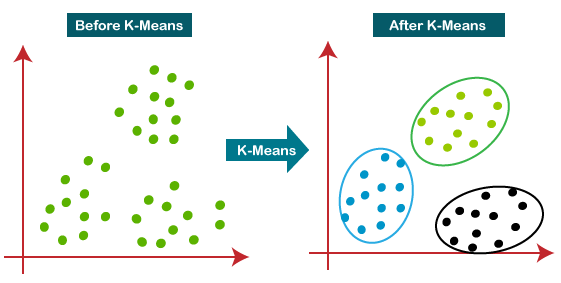
  
# Imports
With the background information covered, let's start off as most projects do and work through the imports we will need. First off, we will need pandas and numpy to work with our data, as well as seaborn and matplotlib for some visualizations. Finally, we will be using sklearn for the KMeans clustering model and some data preprocessing. The PCA module is used at the end to aid in some visualizations as well.

In [2]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

With the packages imported, we can now read in the data to take a look at it

In [3]:
# Read in data
data = pd.read_csv("./data/Chemical Composion of Ceramic.csv")
data.head()

,Ceramic Name,Part,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
0,FLQ-1-b,Body,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80,90
1,FLQ-2-b,Body,0.57,0.47,21.19,70.09,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100,110
2,FLQ-3-b,Body,0.49,0.19,18.60,74.70,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80,200
3,FLQ-4-b,Body,0.89,0.30,18.01,74.19,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70,210
4,FLQ-5-b,Body,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80,150


Using the head() function from pandas, we can get an idea of how our DataFrame looks. We can see that we have categorical variables for 'Ceramic Name' which describes the sample, as well as 'Part' which tells us what part of the celadon which the sample comes from (either from the body or from the glaze). The next 17 columns describe the percentages of molecules found in the sample and are real-valued. The molecules along with the measurement type (percentage composition by weight or ppm) are:
- Na2O (wt%)
- MgO (wt%)
- Al2O3 (wt%)
- SiO2 (wt%)
- K2O (wt%)
- CaO (wt%)
- TiO2 (wt%)
- Fe2O3 (wt%)
- MnO (ppm)
- CuO (ppm)
- ZnO (ppm)
- PbO2 (ppm)
- Rb2O (ppm)
- SrO (ppm)
- Y2O3 (ppm)
- ZrO2 (ppm)
- P2O5 (ppm)

# Data Preprocessing  
So, we can see that our real-valued features are of two different scales (this will come into play later). For our task, the 'Ceramic Name' feature is simply unneeded, so we can just drop it from our set. Also, since 'Part' is categorical, lets encode it as a binary feature, where 1 indicates 'Body' and 0 indicates 'Glaze'.

In [4]:
# Encode categorical feature
data['Part'] = data['Part'].map({'Body':1, 'Glaze':0})

# Drop unneeded 'Ceramic Name'
data = data.drop(['Ceramic Name'], axis=1)
data.head()

,Part,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
0,1,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80,90
1,1,0.57,0.47,21.19,70.09,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100,110
2,1,0.49,0.19,18.60,74.70,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80,200
3,1,0.89,0.30,18.01,74.19,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70,210
4,1,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80,150


Great! Now, we can pull out the 'Part' column from the set since our task is unsupervised.

In [5]:
# Store labels separately
labels = data['Part'].copy()

# Drop labels from data
data = data.drop(['Part'], axis=1)

labels

0     1
1     1
2     1
3     1
4     1
     ..
83    0
84    0
85    0
86    0
87    0
Name: Part, Length: 88, dtype: int64

Since our features are scaled differently, and the euclidean distance metric will be heavily affected by this, we can scale our data equally using sklearn's MinMaxScaler().

In [6]:
scaler = sk.preprocessing.MinMaxScaler()
scaled_features = scaler.fit_transform(data.values)

scaled_features

array([[0.31891892, 0.248     , 0.54743083, ..., 0.33333333, 0.08823529,
        0.02564103],
       [0.29189189, 0.32      , 0.65151515, ..., 0.33333333, 0.14705882,
        0.03846154],
       [0.24864865, 0.096     , 0.48089592, ..., 0.33333333, 0.08823529,
        0.09615385],
       ...,
       [0.10810811, 0.136     , 0.1113307 , ..., 0.33333333, 0.20588235,
        0.27564103],
       [0.05945946, 0.312     , 0.08695652, ..., 0.33333333, 0.23529412,
        0.67307692],
       [0.05945946, 0.448     , 0.19433465, ..., 0.33333333, 0.17647059,
        0.41025641]])

Our features are now scaled properly for the model. To finish up, we can set X (features) and y (labels).

In [7]:
X = scaled_features
y = labels.values

# Applying K-Means Clustering
With the processing now done, we can fit our clustering algorithm to the data. For this, we will first need to create the K-Means model from sklearn. To instantiate our model, we will need to provide it with some parameters first.  
  
Remember how K-Means clusters data points into K distinct clusters? Well, we now have to tell it how many clusters we want it to find. Our goal is to try and cluster the ceramic samples by type (body or glaze), so we are going to tell K-Means to find 2 clusters in our dataset with the *n_clusters* parameter.  Also, we will define *n_init* to tell the model how many times to run the algorithm with different initial centroids. The best model from all the runs will be the model we get out. A standard K-Means algorithm uses random initial centroids, so we may get different results across runs. To change this a bit, we will set *init* to change the centroid initialization method. Instead of random, we can use the k-means++ method which selects centroids with sampling based on an empirical probability distribution of each points contribution to the overall inertia. In K-Means clustering, inertia is a metric used to assess how well the data points within a cluster are grouped around their centroid. Intertia is defined as the sum of the squared distances between each data point in a cluster and the centroid of that cluster. In sklearn, the k-means++ method is actually greedy k-means++ which makes several trials at each sampling step and choosing the best centroid. Finally, we set *max_iter* to an abitrary high value, giving the model time to converge. *verbose* is set to 1 so that we get some outputs when we fit the model.


In [8]:
# Create the K-Means Model
kmeans_model = KMeans(n_clusters = 2,
                      n_init = 'auto',
                      init = 'k-means++',
                      max_iter = 500,
                      verbose = 1)

Next, we can fit our model. We will use the model's fit() function to fit it. We must provide the features to the fit method for the model to use when training. This is easy. Just put *X* inside the fit call.  
  
After the model finished fitting, we can get the cluster assignments through the model's *labels_* property. The underscore at the end indicates that this is a learned property which only has meaning after the model has been fit.

In [9]:
# Fit the model
kmeans_model.fit(X)

# Get cluster assignments for data
clusters = kmeans_model.labels_
clusters

Initialization complete
Iteration 0, inertia 115.53158583040964.
Iteration 1, inertia 56.20177380077497.
Iteration 2, inertia 54.51217674700772.
Iteration 3, inertia 51.095208056234235.
Iteration 4, inertia 50.70926171516276.
Converged at iteration 4: strict convergence.


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

After the model is fitted, we get the cluster assignments. From the output above, we can see what those assignments are. Also, we can see how the inertia was minimized by the algorithm and thus decreases in successive iterations.   
  
Here, it is important to note that these cluster assignments have no tie to the original labels. In other words, a cluster assignment label of 1 does not necessarily mean that the datapoint *is* part of the body of a ceramic sample. These cluster assignments are simply what the K-Means model thinks is correct after it has been trained. The data points in cluster 1 are just the most similar (by way of euclidean distance) to other data points within its own cluster, and dissimilar from those in cluster 0.  

# Evaluation with Visualizations
To get an idea of what the clusters assignments mean, we can plot the data points and color them by their cluster assignment. Then, we can compare that to a plot of the data points colored by their true label (body or glaze) and see if K-Means was able to cluster the points together by ceramic sample type. To do this, however, we need to reduce the dimensionality of our feature-set to something that we can visually comprehend. The easiest way to do this is to squish the features down from 17 dimensions down to 2. In 2 dimensions, we can simply plot it on a 2D coordinate plane. How can we do this?  
  
This is where principal component analysis (PCA) comes in. PCA tries to identify a new set of axes (components) which captures the most variation in the data. This allows us to reduce dimensionality while preserving the most essential characteristics of the input data. To use PCA, we can just create a PCA() object and tell it to reduce to 2 components (for a 2D visualization). Then, we can call the fit_transform() method with *X* to get out out our 2 principal components.

In [10]:
# Create PCA
pca = PCA(n_components=2)

# Fit PCA and transform X into principal components
components = pca.fit_transform(X)

Now, we can build our plot using the first component as x and the second component as y. Additionally, we can add some styling to make our plot visually pleasing.

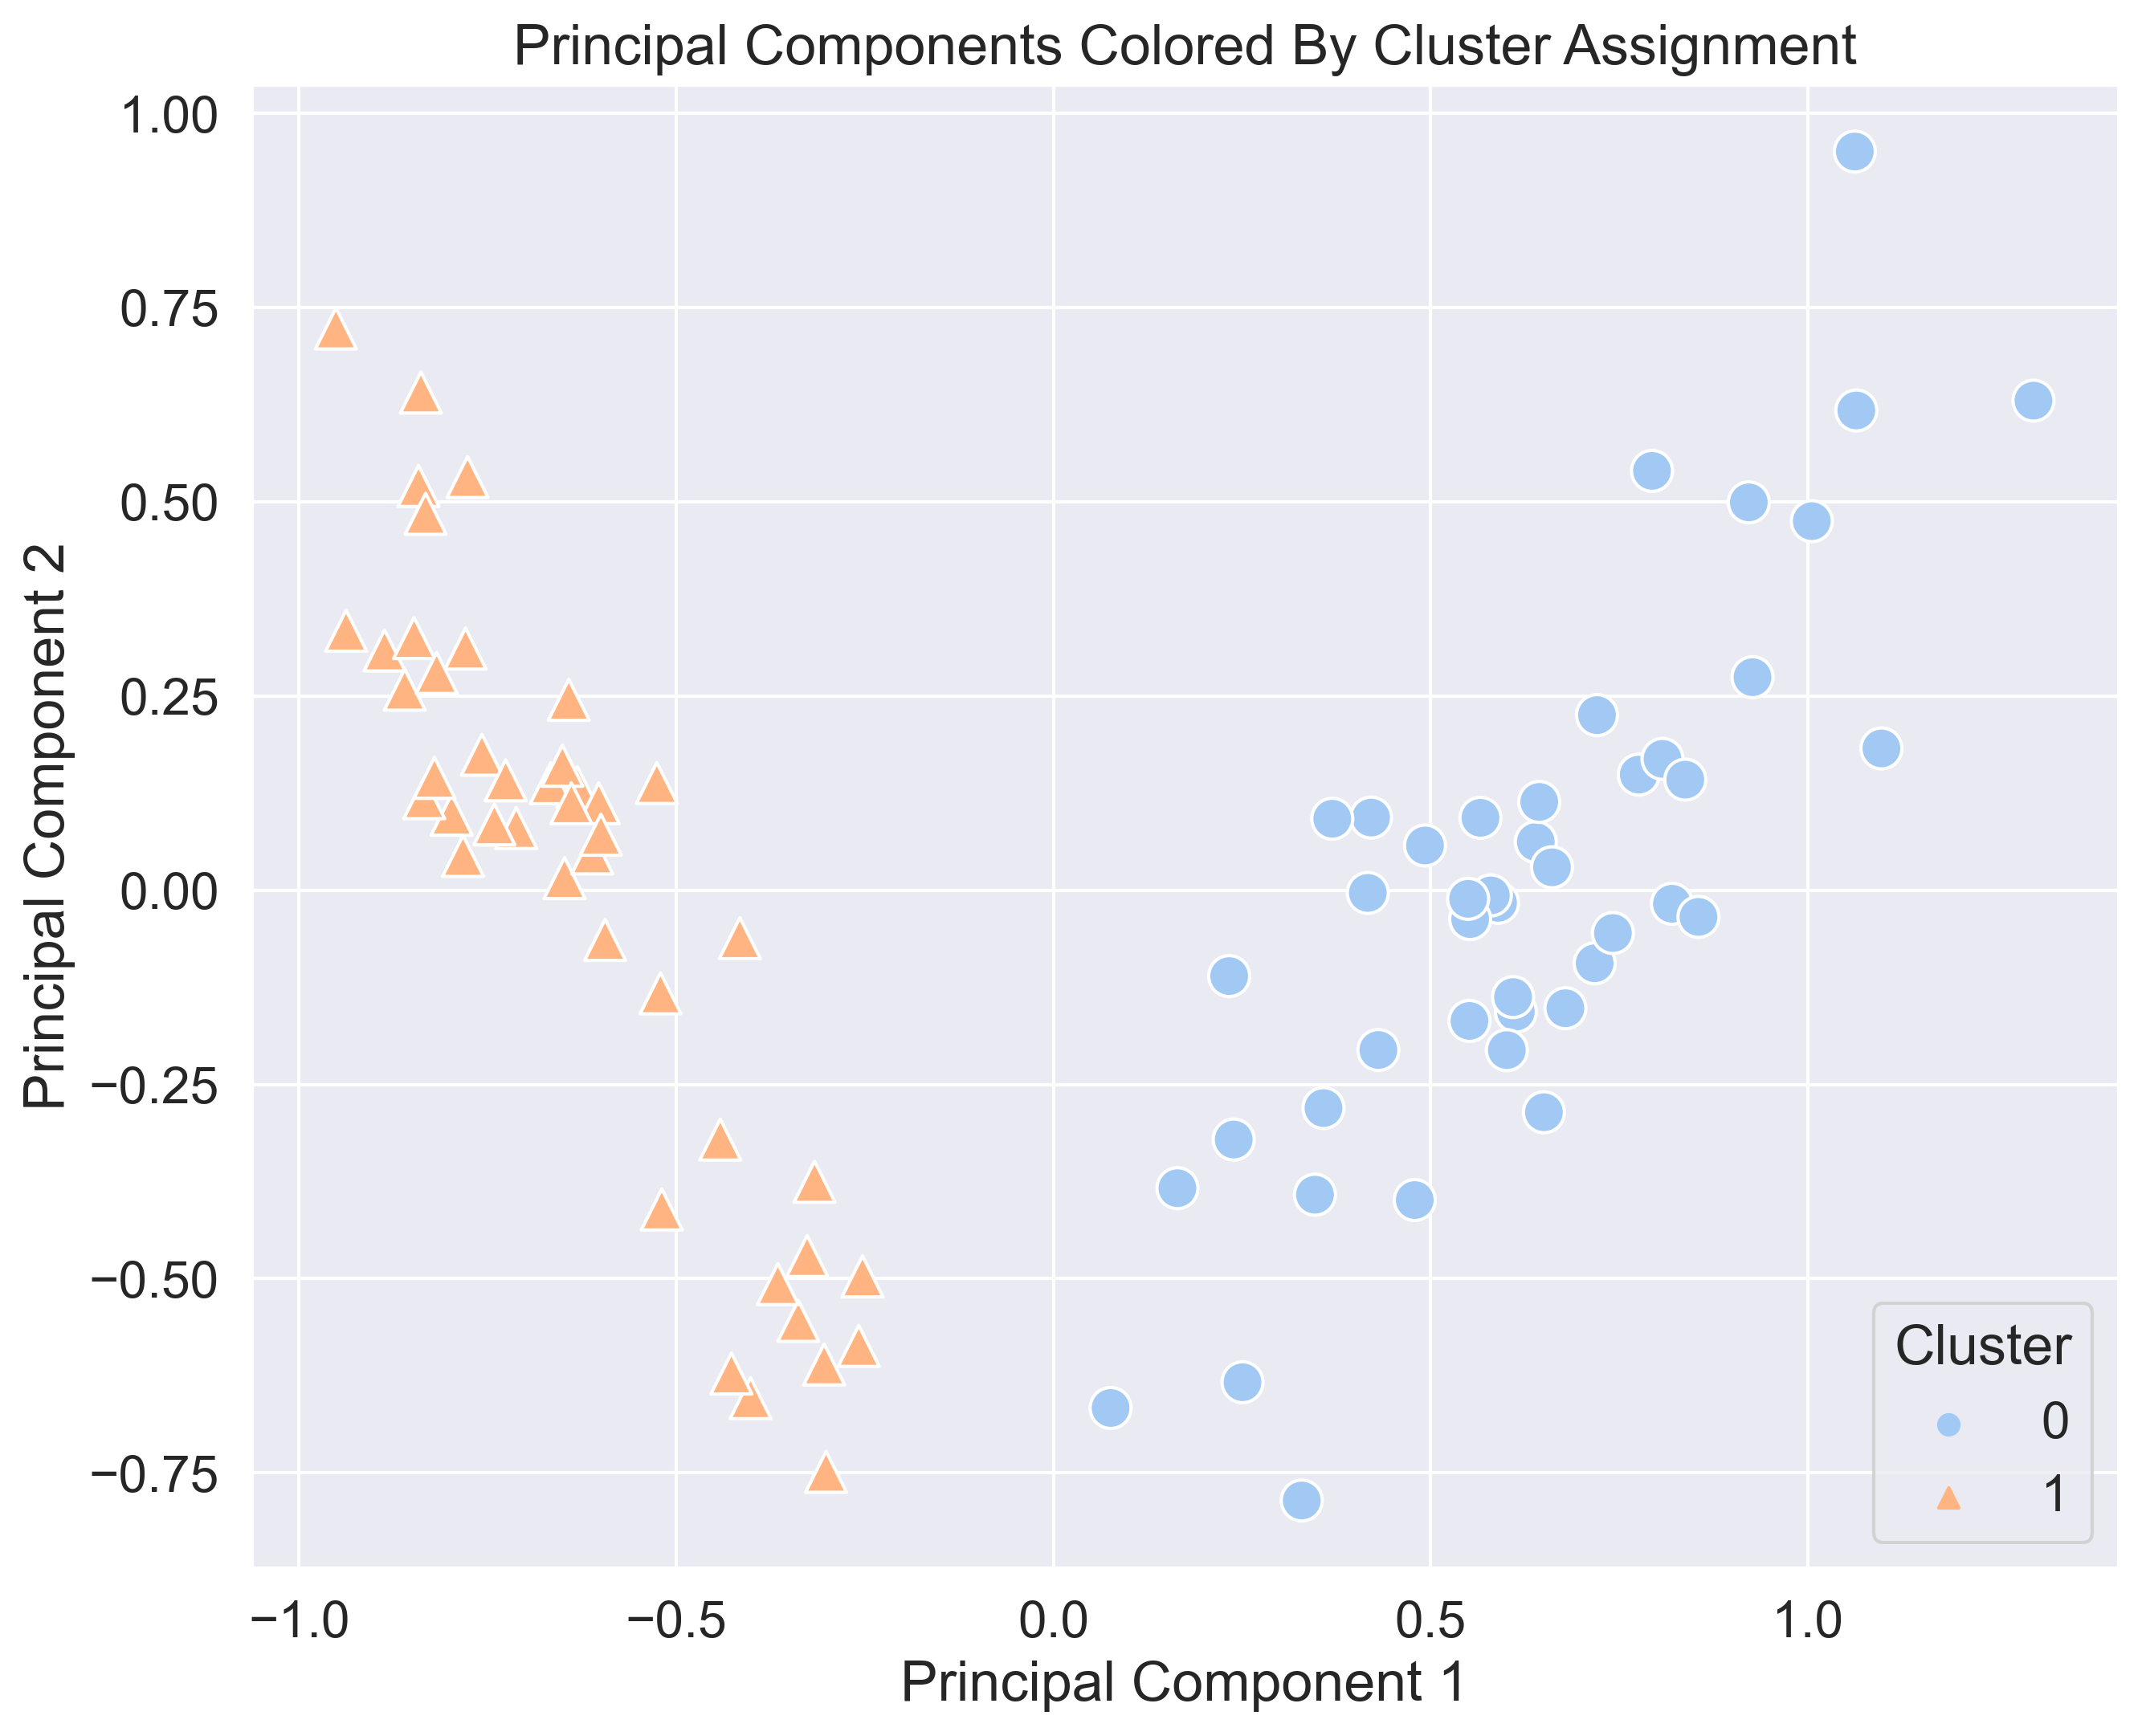

In [11]:
# Get 2 Principal Components
component_1 = components[:, 0]
component_2 = components[:, 1]

# Create dataframe for plot
cluster_data = pd.DataFrame({'Principal Component 1' : component_1,
                             'Principal Component 2' : component_2,
                             'Clusters' : clusters})


# Set sns styling
sns.set(style='darkgrid',
        font_scale = 1.4)


# Visualize with scatterplot
plt.figure(figsize=(10,8), dpi=300)
sns.scatterplot(data = cluster_data,
                x = 'Principal Component 1',
                y = 'Principal Component 2',
                hue = 'Clusters',
                style = 'Clusters',
                palette='pastel',
                s = 150,
                markers=['o', '^'])

# Add plot styling
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Components Colored By Cluster Assignment')
plt.legend(loc = 'lower right', title = 'Cluster')
plt.show()

Next, do the same plot as above, but instead of cluster assignments, we will use the actual labels from the original dataset.

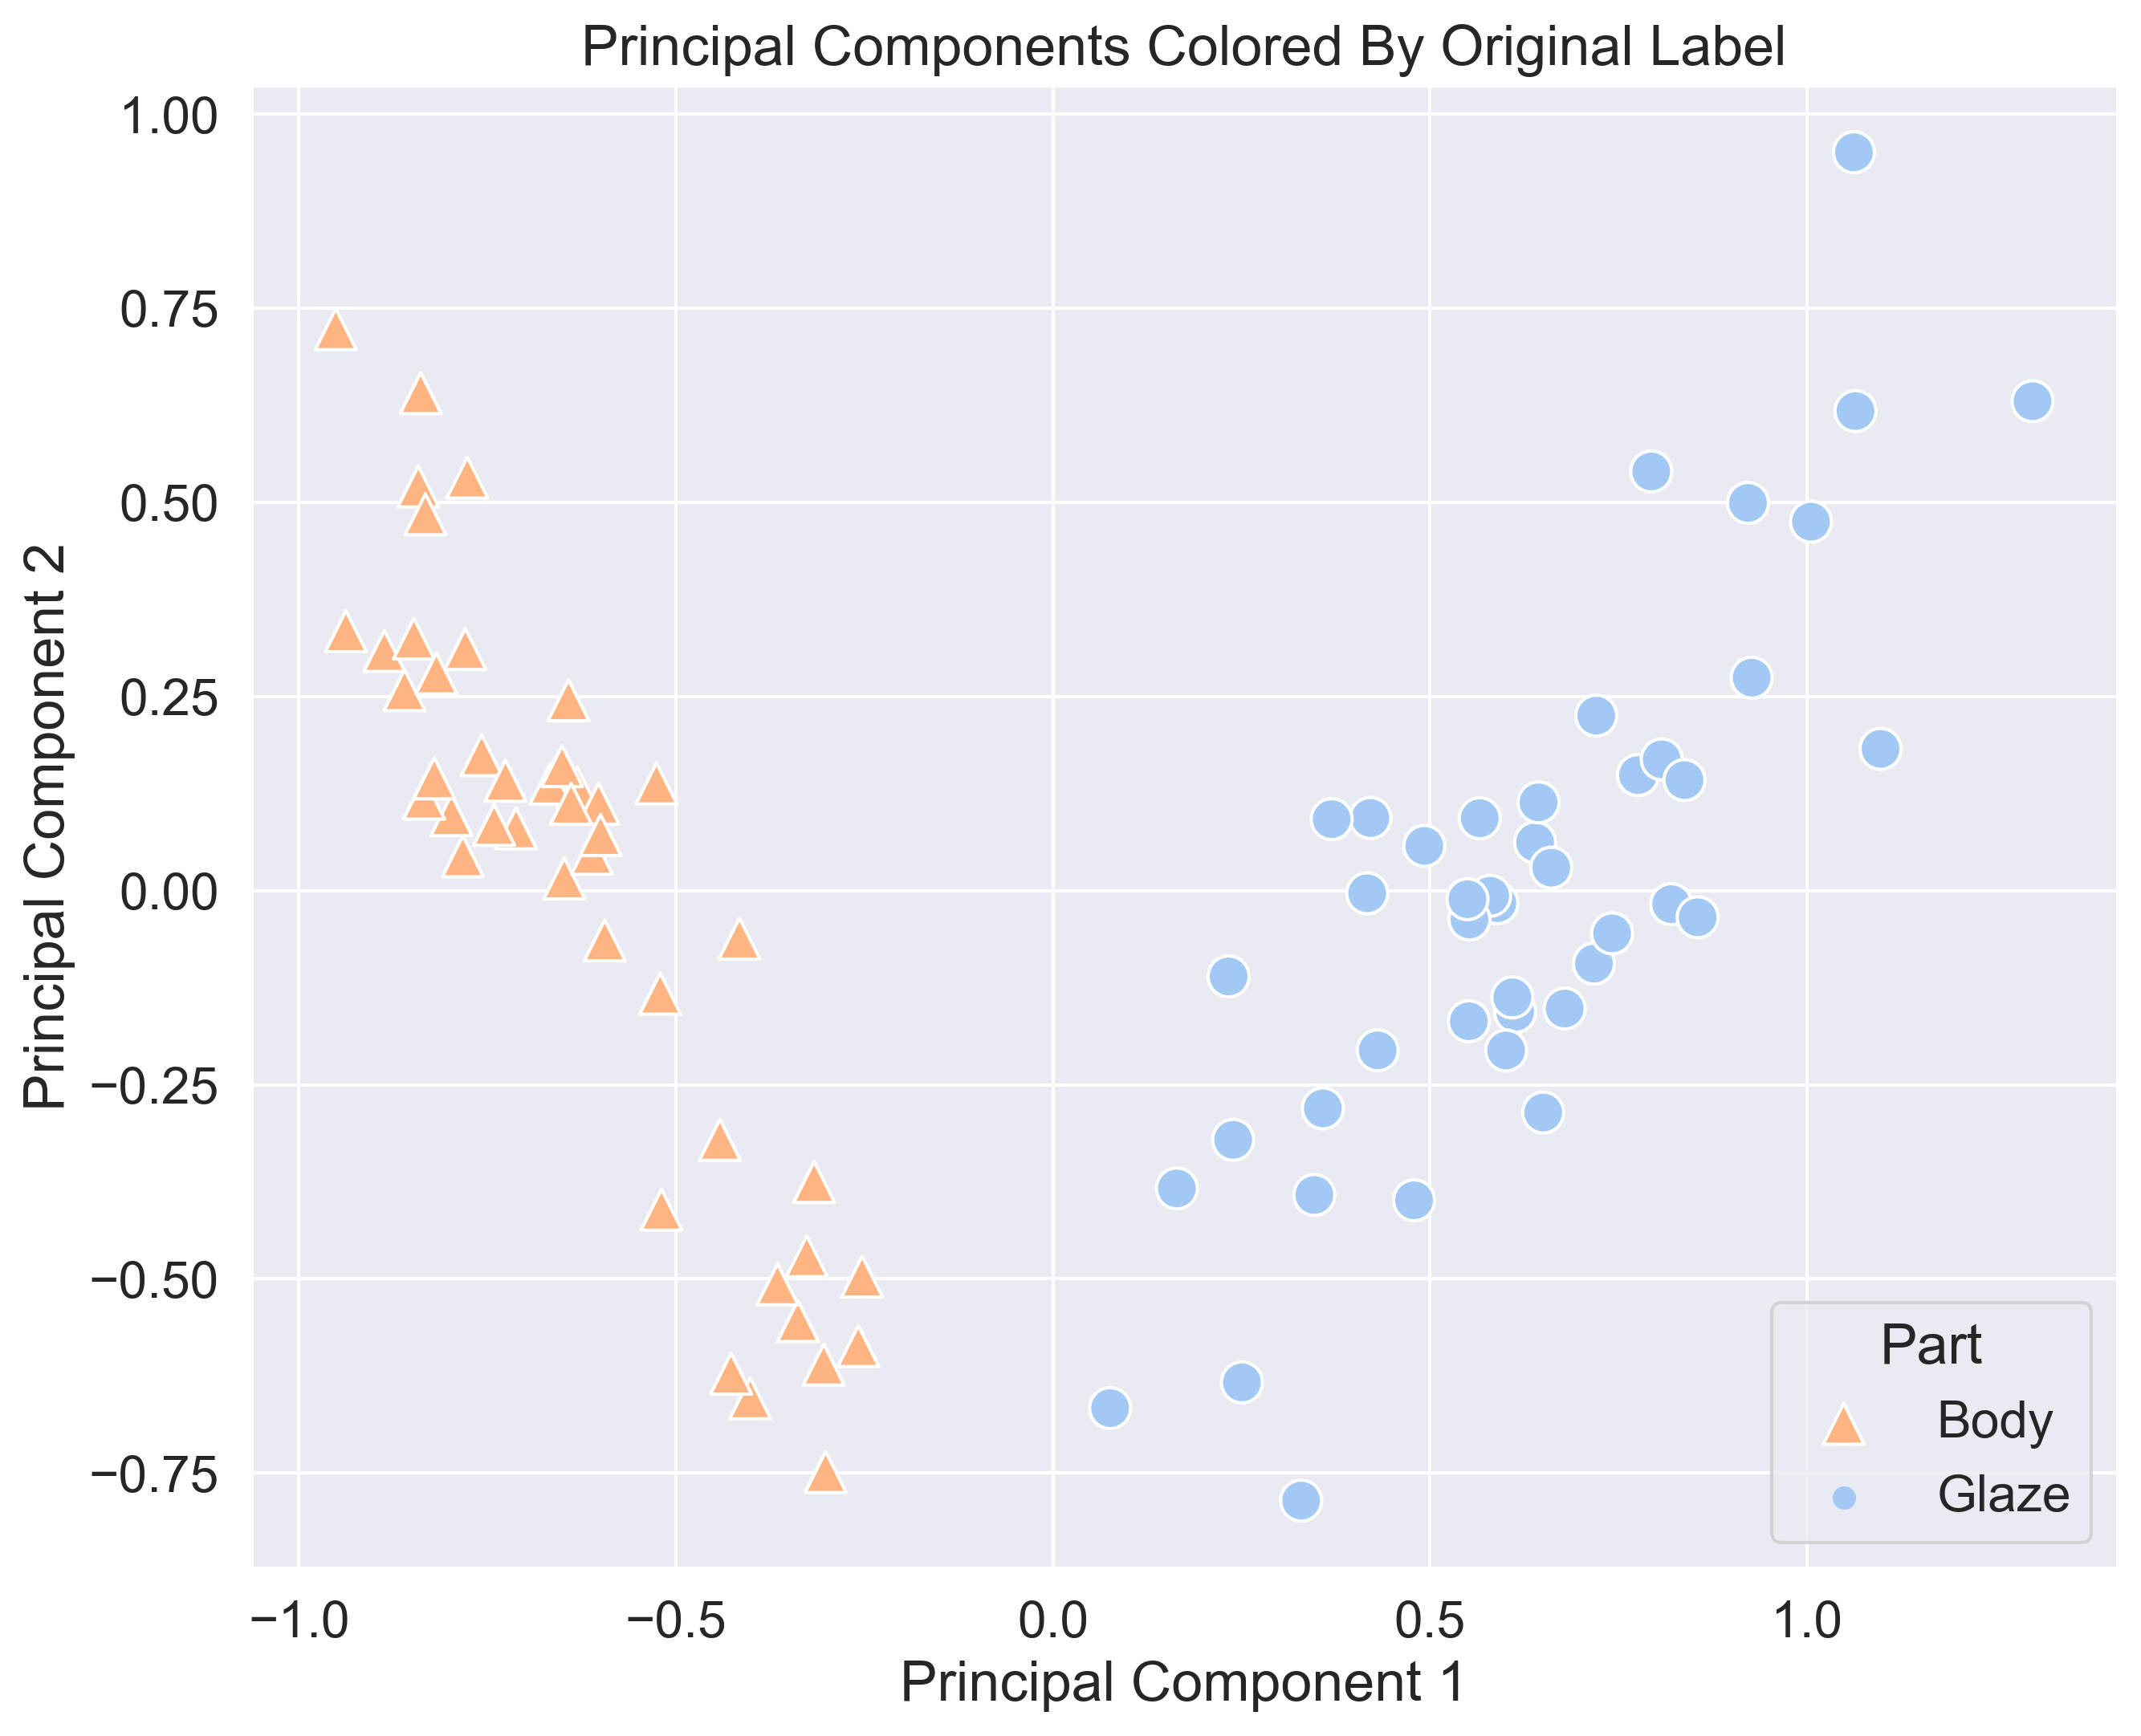

In [12]:
# Create dataframe for plot
label_data = pd.DataFrame({'Principal Component 1' : component_1,
                           'Principal Component 2' : component_2,
                           'Part' : labels})


# Set sns styling
sns.set(style='darkgrid',
        font_scale = 1.4)


# Visualize with scatterplot
plt.figure(figsize=(10,8), dpi=300)
sns.scatterplot(data = label_data,
                x = 'Principal Component 1',
                y = 'Principal Component 2',
                hue = 'Part',
                style = 'Part',
                palette='pastel',
                s = 150,
                markers=['o', '^'])

# Add plot styling
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Components Colored By Original Label')
plt.legend(loc = 'lower right', title = 'Part', labels=['Body', 'Glaze'])
plt.show()

Woah, those look exactly the same. This means that our clustering algorithm worked quite well. We can see that K-Means perfectly split up our samples into one cluster for body samples and one cluster for glaze samples just by chemical composition.  
  
With these plots, we can also conclude that cluster 0 maps directly to glaze parts, and cluster 1 maps directly to body parts. And, each sample was clustered correctly with respect to the ceramic sample type.  

# Visualizing K-Means Iterations
Our project is pretty much done at this point, but let's take a second to try and understand what K-Means is doing behind the scenes. To do this, we will try and manually iterate the K-Means algorithm.  
  
Here, we set a for loop to run 5 iterations. For each iteration, we will create a new K-Means model and only do a single run, by setting *n_init* to 1 and only having it do a single iteration with *max_iter* set to one. We will then fit the model, store the centroids for the next for loop iteration, save the model to the models array, and print the inertia for each iteration. *init* will be set to k-means++ initially, and then set to the centroids from the previous iteration for successive loops. The random state is set in order to make this reproducible for any readers.

In [13]:
iterations = 5
centroids = None
models = []

for i in range(iterations):
    # Set centroids to previous iteration's centroids if they exits
    # If this is the first iteration, then set it to k-means++
    p_centroids = centroids
    if (p_centroids is None): p_centroids = 'k-means++'
        
    # Build model
    kmeans_model = KMeans(n_clusters = 2,
                          n_init = 1,
                          init = p_centroids,
                          max_iter = 1,
                          random_state=8)
    
    # Fit model
    kmeans_model.fit(X)
    
    # Store centroids for next iter
    centroids = kmeans_model.cluster_centers_
    
    # Save model
    models.append(kmeans_model)
    
    # Print inertia
    print(f'Iteration {i}, intertia {kmeans_model.inertia_}.')

Iteration 0, intertia 80.69248216214388.
Iteration 1, intertia 67.91899805018879.
Iteration 2, intertia 52.70484611171963.
Iteration 3, intertia 50.868247072045826.
Iteration 4, intertia 50.70926171516276.


Now, for each saved model, we want to make the same plots as before to see how the clusters may change over iterations. We will make use of subplots for this. We simply pull label clusters for each model, and then plot them on scatterplots. We will also plot the centroids to see how they move around.

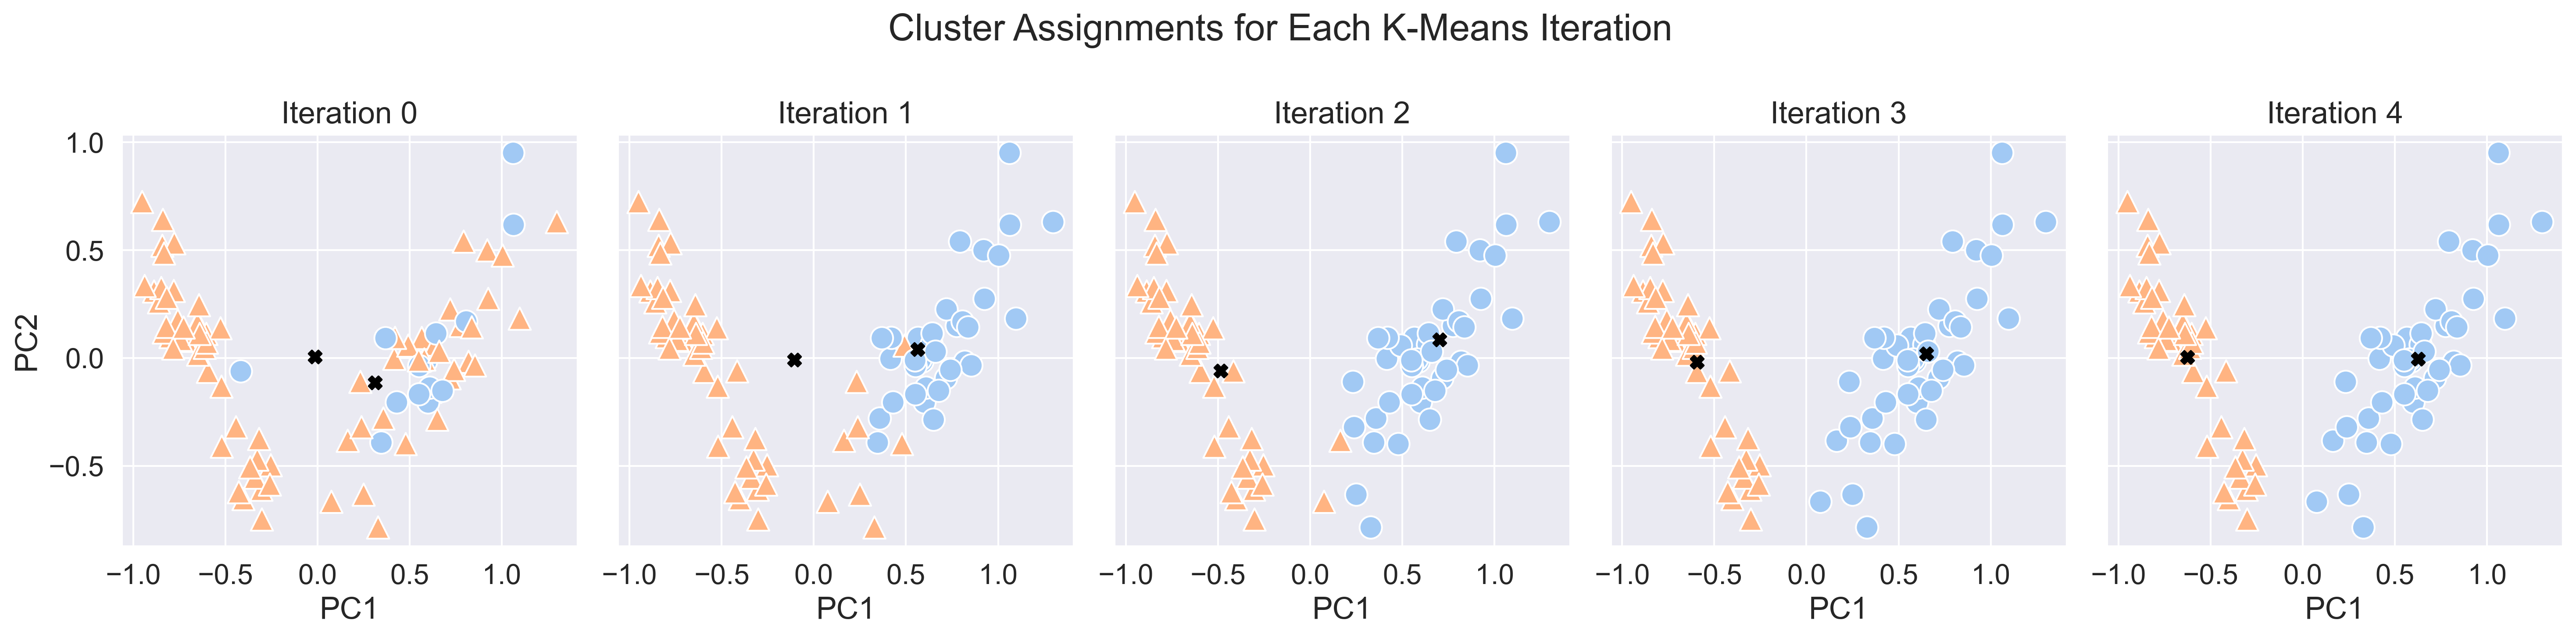

In [14]:
# Create figure and subplot axes
fig, axes = plt.subplots(1, 5, figsize=(20, 5), dpi=300, sharey = True)

for idx, (model, ax) in enumerate(zip(models, axes), start=1):
    # Create dataframe for plot
    cluster_data = pd.DataFrame({'Principal Component 1' : component_1,
                                 'Principal Component 2' : component_2,
                                 'Cluster' : model.labels_})
    
    # Make scatterplot
    sns.set(style='darkgrid',
        font_scale = 1.4)

    sns.scatterplot(ax = ax,
                    data = cluster_data,
                    x = 'Principal Component 1',
                    y = 'Principal Component 2',
                    hue = 'Cluster',
                    style = 'Cluster',
                    palette='pastel',
                    s = 150,
                    markers=['o', '^'])
    
    ax.set_title(f'Iteration {idx-1}')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.legend(loc = 'lower right', title = 'Cluster')
    if i != 1:
        ax.legend().set_visible(False)
    
    
    # Plot Centroids
    centroids = pca.transform(model.cluster_centers_)
    ax.scatter(centroids[:, 0],
               centroids[:, 1],
               c='black',
               marker='X',
               s=50,
               label='Centroids')

fig.suptitle('Cluster Assignments for Each K-Means Iteration')
plt.tight_layout()
plt.show()

With these plots done, we can take a look at how the centroids slowly move towards each distinct grouping in the dataset. The centroids are marked on each plot with a black X.  
  
In the iteration 0, the algorithm does not really understand what is going on. It has tried to set initial centroids with the k-means++ sampling method, but those centroids are far from perfect. No worthwhile clustering exists. We can see circles and triangles all mixed up since the algorithm has yet to figure out the best clusters yet. As the we move to next iterations, centroids are re-computed and data points are re-assigned to the nearest centroids. The centroids move further and further towards the left and right (where the groups of body and glaze points exist). At around iteration 2, we are nearing the optimal solution and so the centroids no longer have to move very much. Then, after iteration 3, we seem to have found an optimal solution. After this, no further re-assignments are required. This is why iterations 3 and 4 look exactly the same.

# Conclusion
Conclusively, K-Means has proved to be quite a powerful clustering algorithm, allowing us to cluster ceramic samples by just chemical composition alone. With this newfound knowledge of unsupervised machine learning techniques, we have gained extremely valuable insights into the inherent patterns and structures present within our dataset. The K-Means model's ability to automatically group our data points based on shared characteristics regarding chemical composition has not only allowed us to identify distinct body and glaze pieces, but also paved the way for further exploration into the field of unsupervised learning.  
  
With our project, we have shown how machine learning techniques can be applied in fields like archaeology and material sciences. But, machine learning can do so much more! The insights gained here has assisted us in clustering pottery samples, but can also be applied into almost any field of work imaginable. As machine learning continues to develop and we begin integrating newer and more advanced techniques for various tasks, we will all look back on these foundational concepts with appreciation. For now, I will sign off, but for those still around, I hope you learned something and I am excited for whatever the future has in store for you.